<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/Covid-19-/blob/master/covid_19_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
cd gdrive/My\ Drive/covid

[Errno 2] No such file or directory: 'gdrive/My Drive/covid'
/content/gdrive/My Drive/covid


In [25]:
!ls

best_model.hdf5  images  metadata.csv  test  train


In [0]:
import pandas as pd 
df = pd.read_csv('metadata.csv')

In [27]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [28]:
df.shape

(354, 28)

In [29]:
import os 
print(len(os.listdir('images/')))

345


In [6]:
df['finding'].value_counts()

COVID-19          278
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64

In [30]:
df.drop_duplicates(inplace=True)
df.shape


(354, 28)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               354 non-null    int64  
 1   offset                  258 non-null    float64
 2   sex                     311 non-null    object 
 3   age                     300 non-null    float64
 4   finding                 354 non-null    object 
 5   survival                109 non-null    object 
 6   intubated               71 non-null     object 
 7   intubation_present      61 non-null     object 
 8   went_icu                24 non-null     object 
 9   needed_supplemental_O2  6 non-null      object 
 10  extubated               16 non-null     object 
 11  temperature             28 non-null     float64
 12  pO2_saturation          37 non-null     float64
 13  leukocyte_count         9 non-null      float64
 14  neutrophil_count        2 non-null      fl

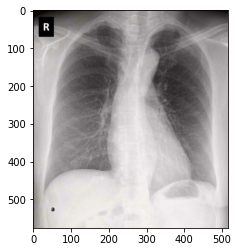

In [8]:
import cv2                 
import matplotlib.pyplot as plt
img= cv2.imread('images/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png')
plt.imshow(img)

In [0]:
covidfiles=[]
for idx, row in df.iterrows():
  t= row['finding']
  filename= row['filename']
  if t=='COVID-19' or t=='COVID-19, ARDS':
    covidfiles.append(filename) 

In [32]:
print(len(covidfiles))

290


In [0]:
 i=0
 for img in os.listdir('images'):
   print(img)
   i=i+1
   if i==1:
     break

X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg


In [0]:
def label_img(img):
  if img in covidfiles:
    return 1
  else :
    return 0  

In [0]:
import numpy as np         
import os                
from tqdm import tqdm 
from random import shuffle
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir('images')):
        label = label_img(img)
        path = os.path.join('images',img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img =cv2.resize(img, (256,256))
        training_data.append([np.array(img),label])
    shuffle(training_data)
    return training_data

In [35]:
data = create_train_data()

100%|██████████| 345/345 [00:07<00:00, 43.94it/s]


In [0]:
train = data[:-87]
test = data[-87:]
x_train = np.array([i[0] for i in train]).reshape(-1,256,256,1)
y_train = np.array([i[1] for i in train])

x_test = np.array([i[0] for i in test]).reshape(-1,256,256,1)
y_test =np.array([i[1] for i in test])

In [38]:
x_train.shape

(258, 256, 256, 1)

# **Frist train from skratch**

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 256)      

In [40]:
#from sklearn.utils import class_weight
#class_weight = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
model_hist=model.fit(x_train , y_train ,batch_size=32,epochs=20,validation_data=[x_test ,y_test])

Train on 258 samples, validate on 87 samples
Epoch 1/20
258/258 [==============================] - 1s 5ms/step - loss: 44.2908 - accuracy: 0.5891 - val_loss: 8.2964 - val_accuracy: 0.8046
Epoch 2/20
258/258 [==============================] - 1s 3ms/step - loss: 3.7883 - accuracy: 0.6550 - val_loss: 0.7020 - val_accuracy: 0.3563
Epoch 3/20
258/258 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.7519 - val_loss: 0.4928 - val_accuracy: 0.8046
Epoch 4/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5440 - accuracy: 0.7713 - val_loss: 0.5969 - val_accuracy: 0.8046
Epoch 5/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5816 - accuracy: 0.7829 - val_loss: 0.5234 - val_accuracy: 0.8161
Epoch 6/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7829 - val_loss: 0.5529 - val_accuracy: 0.8276
Epoch 7/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7984 - 

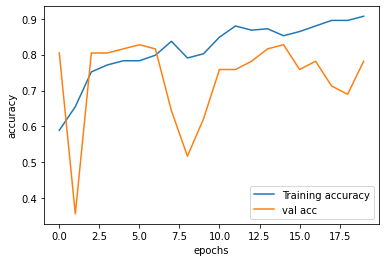

In [43]:
plt.plot(model_hist.history['accuracy'],label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

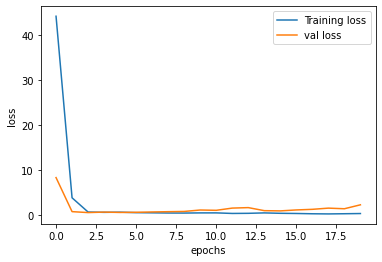

In [45]:
plt.plot(model_hist.history['loss'],label='Training loss')
plt.plot(model_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **try to do data augmentation to increase number of dataset**

In [46]:
from keras.preprocessing.image import ImageDataGenerator
datagentrain = ImageDataGenerator(rescale=1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
datagentest=ImageDataGenerator(rescale=1./255)
train = datagentrain.flow(x_train , y_train , batch_size =32)
test = datagentest.flow(x_test, y_test ,batch_size =32)
model2_hist=model.fit_generator(train ,steps_per_epoch=20,epochs=20,validation_data=test,validation_steps=5)

Epoch 1/20
20/20 [==============================] - 3s 149ms/step - loss: 0.5375 - accuracy: 0.7709 - val_loss: 0.5288 - val_accuracy: 0.7947
Epoch 2/20
20/20 [==============================] - 3s 159ms/step - loss: 0.5364 - accuracy: 0.7639 - val_loss: 0.6510 - val_accuracy: 0.7887
Epoch 3/20
20/20 [==============================] - 3s 143ms/step - loss: 0.5388 - accuracy: 0.7818 - val_loss: 0.3806 - val_accuracy: 0.8310
Epoch 4/20
20/20 [==============================] - 3s 149ms/step - loss: 0.5456 - accuracy: 0.7741 - val_loss: 0.5417 - val_accuracy: 0.8079
Epoch 5/20
20/20 [==============================] - 3s 154ms/step - loss: 0.5463 - accuracy: 0.7569 - val_loss: 0.5610 - val_accuracy: 0.7676
Epoch 6/20
20/20 [==============================] - 3s 148ms/step - loss: 0.5130 - accuracy: 0.7707 - val_loss: 0.3700 - val_accuracy: 0.8028
Epoch 7/20
20/20 [==============================] - 3s 144ms/step - loss: 0.5150 - accuracy: 0.7690 - val_loss: 0.4817 - val_accuracy: 0.7881
Epoch 

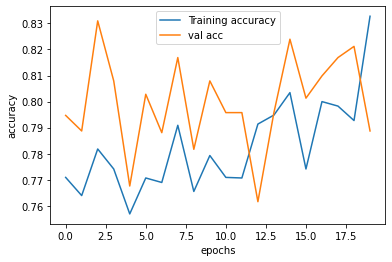

In [47]:
plt.plot(model2_hist.history['accuracy'],label='Training accuracy')
plt.plot(model2_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

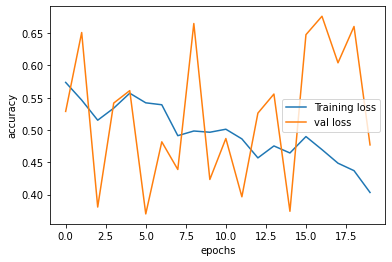

In [48]:
plt.plot(model2_hist.history['loss'],label='Training loss')
plt.plot(model2_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Using transfer learning without fine tunning 
i use a kaggle [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge) i just use the dataset and apply a clssifiction on it u can check this work in those kernel 


*   [here](https://www.kaggle.com/omarkhald/rsna-classification)
*   [here](https://www.kaggle.com/omarkhald/rsna-classification-2)
i use this to do the transfer learning it get 77% accuracy 





In [49]:
from keras.models import load_model
pmodel = load_model('best_model.hdf5')
pmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [50]:
premodel_hist=pmodel.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=[x_test ,y_test])

Train on 258 samples, validate on 87 samples
Epoch 1/20
258/258 [==============================] - 1s 4ms/step - loss: 22.9381 - accuracy: 0.5155 - val_loss: 0.4997 - val_accuracy: 0.8046
Epoch 2/20
258/258 [==============================] - 1s 3ms/step - loss: 1.1707 - accuracy: 0.6008 - val_loss: 0.4978 - val_accuracy: 0.8046
Epoch 3/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5344 - accuracy: 0.7713 - val_loss: 0.5311 - val_accuracy: 0.8046
Epoch 4/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.7713 - val_loss: 0.5514 - val_accuracy: 0.8161
Epoch 5/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7868 - val_loss: 0.6118 - val_accuracy: 0.8046
Epoch 6/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7984 - val_loss: 0.8368 - val_accuracy: 0.7931
Epoch 7/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.8101 - 

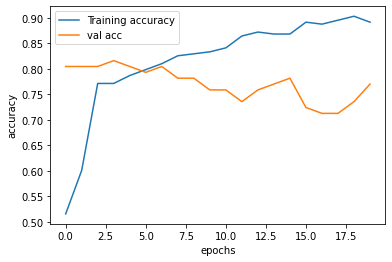

In [51]:
plt.plot(premodel_hist.history['accuracy'],label='Training accuracy')
plt.plot(premodel_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

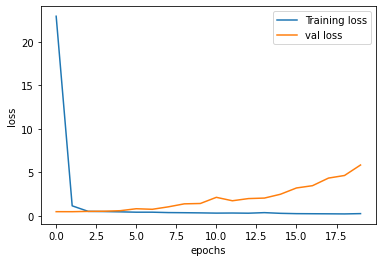

In [52]:
plt.plot(premodel_hist.history['loss'],label='Training loss')
plt.plot(premodel_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [53]:
pmodel_hist=pmodel.fit_generator(train ,steps_per_epoch=20,epochs=20,validation_data=test,validation_steps=3)

Epoch 1/20
20/20 [==============================] - 3s 150ms/step - loss: 0.6050 - accuracy: 0.7759 - val_loss: 0.5783 - val_accuracy: 0.8046
Epoch 2/20
20/20 [==============================] - 3s 136ms/step - loss: 0.5749 - accuracy: 0.7655 - val_loss: 0.7831 - val_accuracy: 0.8046
Epoch 3/20
20/20 [==============================] - 3s 145ms/step - loss: 0.5417 - accuracy: 0.7724 - val_loss: 0.5774 - val_accuracy: 0.8046
Epoch 4/20
20/20 [==============================] - 3s 147ms/step - loss: 0.5415 - accuracy: 0.7741 - val_loss: 0.4858 - val_accuracy: 0.8046
Epoch 5/20
20/20 [==============================] - 3s 145ms/step - loss: 0.5706 - accuracy: 0.7707 - val_loss: 0.4455 - val_accuracy: 0.8046
Epoch 6/20
20/20 [==============================] - 3s 138ms/step - loss: 0.5041 - accuracy: 0.7709 - val_loss: 0.4636 - val_accuracy: 0.8046
Epoch 7/20
20/20 [==============================] - 3s 151ms/step - loss: 0.5527 - accuracy: 0.7738 - val_loss: 0.4813 - val_accuracy: 0.8046
Epoch 

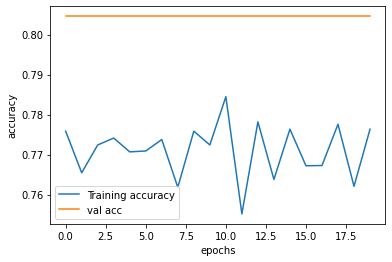

In [54]:
plt.plot(pmodel_hist.history['accuracy'],label='Training accuracy')
plt.plot(pmodel_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

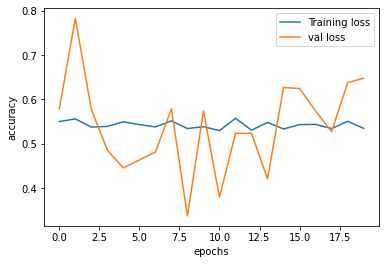

In [55]:
plt.plot(pmodel_hist.history['loss'],label='Training loss')
plt.plot(pmodel_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Do fine tunning 
now we will fine tune the all the dense layers ( decision layers) and will train it 

In [56]:
for layer in pmodel.layers:
    if layer.name == 'dense_3'or layer.name == 'dense_2' or layer.name == 'dense_1' :
      layer.trainable = True
    else:
        layer.trainable = False
pmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
pmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [62]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
train = datagen.flow(x_train , y_train , batch_size =32)
test = datagen.flow(x_test, y_test ,batch_size =32)
fmodel2=pmodel.fit_generator(train ,steps_per_epoch=10,epochs=20,validation_data=test,validation_steps=3,class_weight=class_weight)

Epoch 1/20
10/10 [==============================] - 2s 166ms/step - loss: 2.6888 - acc: 0.7172 - val_loss: 1.8215 - val_acc: 0.8161
Epoch 2/20
10/10 [==============================] - 2s 162ms/step - loss: 1.5280 - acc: 0.7621 - val_loss: 1.3847 - val_acc: 0.7586
Epoch 3/20
10/10 [==============================] - 2s 152ms/step - loss: 0.8794 - acc: 0.7385 - val_loss: 1.0366 - val_acc: 0.7471
Epoch 4/20
10/10 [==============================] - 2s 176ms/step - loss: 0.5704 - acc: 0.7625 - val_loss: 1.3633 - val_acc: 0.7701
Epoch 5/20
10/10 [==============================] - 2s 167ms/step - loss: 0.8158 - acc: 0.7552 - val_loss: 0.4257 - val_acc: 0.7931
Epoch 6/20
10/10 [==============================] - 1s 145ms/step - loss: 0.6497 - acc: 0.7654 - val_loss: 1.5195 - val_acc: 0.7586
Epoch 7/20
10/10 [==============================] - 2s 171ms/step - loss: 0.5293 - acc: 0.7875 - val_loss: 0.5690 - val_acc: 0.7701
Epoch 8/20
10/10 [==============================] - 1s 145ms/step - loss: 0.

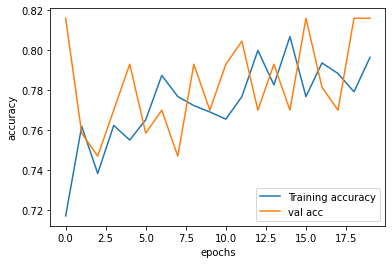

In [63]:
plt.plot(fmodel2.history['acc'],label='Training accuracy')
plt.plot(fmodel2.history['val_acc'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

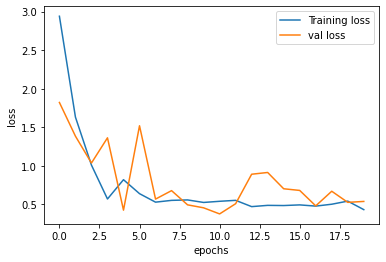

In [64]:
plt.plot(fmodel2.history['loss'],label='Training loss')
plt.plot(fmodel2.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()